## Fruit Image Classification
### data source: https://www.kaggle.com/moltean/fruits

In [1]:
import os
from os import listdir
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.listdir()

['readme.md',
 'fruits-360',
 '.ipynb_checkpoints',
 'Trifecta.jpg',
 'Untitled.ipynb',
 'keras-binary-classification-initial-model.ipynb']

In [4]:
os.listdir('fruits-360')

['readme.md',
 'LICENSE',
 'Test',
 'Training',
 'Test_mini',
 'papers',
 'test-multiple_fruits',
 'Training_mini',
 'cnn_test']

#### inside the training folder are 120 folders of images of fruits. each folder contains pictures of one type of fruit.

In [5]:
print(os.listdir('fruits-360/Training')[:5])
print("number of fruits: ", len(os.listdir('fruits-360/Training')))

['Ginger Root', 'Rambutan', 'Cactus fruit', 'Hazelnut', 'Beetroot']
number of fruits:  120


##### lets look at some pics

In [6]:
print(os.listdir('fruits-360/Training/Ginger Root')[:5])

['91_100.jpg', '184_100.jpg', '86_100.jpg', 'r_83_100.jpg', 'r_169_100.jpg']


In [7]:
print(os.listdir('fruits-360/Training/Banana')[:5])

['117_100.jpg', '173_100.jpg', '327_100.jpg', 'r_294_100.jpg', 'r_203_100.jpg']


In [8]:
print(os.listdir('fruits-360/Training/Cherry 1')[:5])

['117_100.jpg', '316_100.jpg', '173_100.jpg', 'r_12_100.jpg', 'r_294_100.jpg']


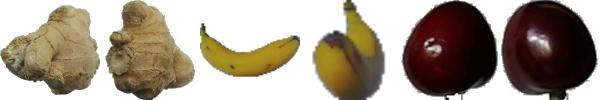

In [9]:
import PIL
from IPython.display import display, Image
from matplotlib.pyplot import imshow
import numpy as np

list_im = ['fruits-360/Training/Ginger Root/91_100.jpg',
                    'fruits-360/Training/Ginger Root/184_100.jpg',
                    'fruits-360/Training/Banana/117_100.jpg',
                    'fruits-360/Training/Banana/173_100.jpg',
                   'fruits-360/Training/Cherry 1/117_100.jpg',
                    'fruits-360/Training/Cherry 1/316_100.jpg']
imgs    = [ PIL.Image.open(i) for i in list_im ]
#all these images are the same size
imgs_comb = np.hstack(imgs)
imgs_comb = PIL.Image.fromarray(imgs_comb)
imgs_comb.save( 'Trifecta.jpg' )    

display(Image(filename='Trifecta.jpg'))

#### GOALS: 
1) use neural network to correctly classify the type of fruits in the test set of images
- binary classification easy (can pick just 2 fruits that DO NOT look similar, ie banana and coconut)
- binary classification harder (can pick just 2 fruits that DO look similar (or ARE similar), maybe avocado and ripe avocado)
- may use other machine learning algorithms from Sklearn to use as comparison to Keras model

2) if some sucess is seen here, can try out the dataset that has multiple fruits per image, this will be more difficult and change up the problem

### binary classification - banana and coconut

In [10]:
from matplotlib import image

#load images - need to convert pixels to numpy arrays 
def load_fruit_pics(dir_path):
    loaded_images = []
    data_labels = []
    for filename in listdir(dir_path):
        # load image
        img_data = image.imread(dir_path + filename)
        # store loaded image
        loaded_images.append(img_data)
        data_labels.append(dir_path.split('/')[2])
        #print('> loaded %s %s' % (filename, img_data.shape))
    return loaded_images, data_labels


bananas_pxl, banana_label=load_fruit_pics('fruits-360/Training/Banana/')
ginger_pxl, ginger_label=load_fruit_pics('fruits-360/Training/Ginger Root/')
coco_pxl, coco_label=load_fruit_pics('fruits-360/Training/Cocos/')

In [14]:
# bananas_pxl, banana_label=load_fruit_pics2('fruits-360/Training/Banana/')
# ginger_pxl, ginger_label=load_fruit_pics2('fruits-360/Training/Ginger Root/')
# coco_pxl, coco_label=load_fruit_pics2('fruits-360/Training/Cocos/')

In [15]:
#think this is the shape we need for neural nets
bananas_pxl[2].shape

(100, 100, 3)

In [16]:
print(len(bananas_pxl))
print(len(ginger_pxl)) # why so few gingers?
print(len(coco_pxl))

490
99
490


In [17]:
#can i just combine these like this?
X= bananas_pxl + coco_pxl
print(len(X))
y=banana_label + coco_label
print(len(y))

980
980


In [18]:
np.array(np.unique(y))

array(['Banana', 'Cocos'], dtype='<U6')

In [19]:
y=pd.Categorical(y).codes

In [20]:
X=np.array(X)
y=np.array(y)

In [21]:
import tensorflow 
import keras
#import idx2numpy
#import os
#import h5py

Using TensorFlow backend.


In [22]:
print (np.__version__)
print (keras.__version__)

1.17.3
2.3.1


In [23]:
#import all the pieces of the neural network
from keras.models import Sequential, Model#the model
from keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from keras.layers import Convolution2D, MaxPooling2D #the convnet
from keras.utils import np_utils #extra tools

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
n_class=len(np.unique(y_train))
y_train=np_utils.to_categorical(y_train, n_class)
y_test=np_utils.to_categorical(y_test, n_class)

In [26]:
#check that everything worked
print('X_train shape:', X_train.shape)
print('y_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (784, 100, 100, 3)
y_train shape: (784, 100, 100, 3)
784 train samples
196 test samples


In [27]:
#data must be reshaped for tensorflow backend input
#keras backend image dim order is tf
# X_train = X_train.reshape(X_train.shape[0], 100, 100, 3)
# X_test = X_test.reshape(X_test.shape[0], 100,100, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalize our data values to the range [0, 1], 255 is the max value of X_train.max()
X_test /= 255

In [28]:
from keras.callbacks import ModelCheckpoint

In [29]:
filepath="weights_best"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [30]:
from keras.callbacks import History #may want to print history if set verbose to 0
history = History()

In [31]:
#THE MODEL#
batch_size = 32
nb_classes = n_class
nb_epoch = 2

img_rows =100
img_cols=100
img_channels = 3

model_input=Input(shape=(img_rows, img_cols,img_channels))

x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x1 = Dense(nb_classes, activation='softmax')(conv_out)
# x2 = Dense(nb_classes, activation='softmax')(conv_out)
# x3 = Dense(nb_classes, activation='softmax')(conv_out)
# x4 = Dense(nb_classes, activation='softmax')(conv_out)
# x5 = Dense(nb_classes, activation='softmax')(conv_out)

lst = [x1]#, x2, x3, x4, x5]

#model = Model(input=model_input, output=lst)
model = Model(input=model_input, output=lst) #I learned you can't use a sequential model for this type of prediction

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[history],verbose=1)
#set verbose to 0 if you run many, 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
784/784 [==============================] - 10s 13ms/step - loss: 0.5619 - accuracy: 0.8559
Epoch 2/2
784/784 [==============================] - 4s 4ms/step - loss: 0.0028 - accuracy: 1.0000


In [33]:
y_pred = model.predict(X_test)

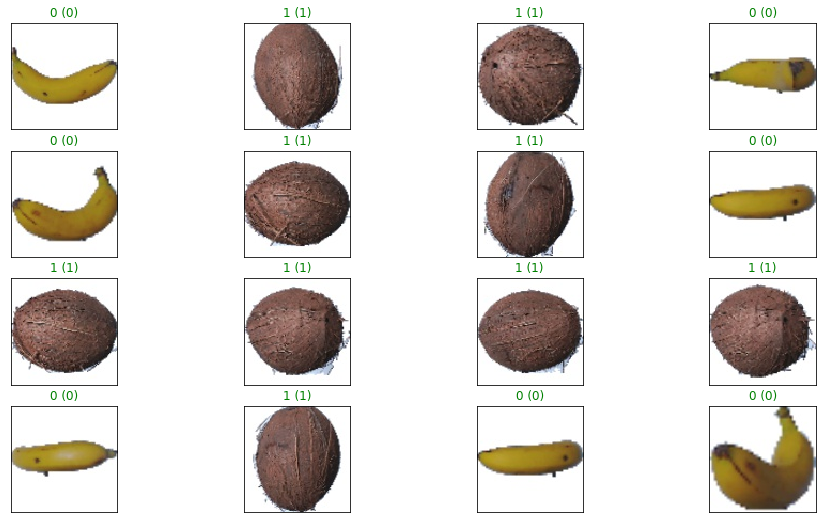

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(pred_idx, true_idx),
                 color=("green" if pred_idx == true_idx else "red"))

#### Bananas = 0 and Cocos = 1
#### somehow this initial model did a pretty great job